# PURPOSE:

This case study aims to identify patterns which indicate if a client
has difficulty paying their installments which may be used for taking actions 
such as denying the loan, reducing the amount of loan, lending 
(to risky applicants) at a higher interest rate, etc. This will ensure that the
consumers capable of repaying the loan are not rejected. Identification of such
applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors 
(or driver variables) behind loan default, i.e. the variables which are strong 
indicators of default.  The company can utilise this knowledge for its 
portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently 
research a little about risk analytics - understanding the types of variables 
and their significance should be enough).

### Importing Relevant Libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Read - Application_Data

In [2]:
#For Application Data - Not Enough RAM
f2="C:/Users/ru1457/Downloads/application_data.csv"

chunksize2 = 10**4
TextFileReader1 = pd.read_csv(f2, chunksize=chunksize2) 
application = pd.concat(TextFileReader1, ignore_index=True) 

In [3]:
print(application.shape)

(307511, 122)


### Picked columns to read based on a glance through the data dictionary
 Saving it into APPLICANT dataframe

In [4]:
app_col_slice1 = application.iloc[:,0:44]
app_col_slice2 = application.iloc[:,116:122]
applicant = pd.concat([app_col_slice1,app_col_slice2],axis=1)

In [5]:
applicant.shape

(307511, 50)

In [6]:
applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### NULL VALUES
Identify Null Value Columns - In order to either drop them, or to impute new values

In [7]:
applicant.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.083037,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.311267,0.622246,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,NaN,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,NaN,0.322738,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
null_value_cols = applicant.isnull().sum()/len(applicant)*100

In [9]:
#Checking for columns with greater than 30% Null values
null_value_cols[null_value_cols>=30]

OWN_CAR_AGE        65.990810
OCCUPATION_TYPE    31.345545
EXT_SOURCE_1       56.381073
dtype: float64

The OCCUPATION_TYPE column could be useful. Also, we wont be able to impute any values for occupation because it's more than 30% missing. Might imbalance the data.
The Car age might be irrelevant to our analysis, and there's no way to impute external ratings when more than 50% values are missing.

In [10]:
#Dropping greater than 32% null values columns
applicant = applicant.drop(columns = null_value_cols[null_value_cols>=32].index )

2 columns out so we should be at 48!
So, now we check the less than 30% NULL value columns

In [11]:
null_value_cols[null_value_cols<32].sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
DAYS_EMPLOYED                   0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER     

In [12]:
df1 = null_value_cols[(null_value_cols<30)&(null_value_cols>10)].index
applicant[df1]

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,0.218859,1.0,0.0,0.0,1.0,0.0,1.0
307509,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Checking the value counts in the columns
for col in applicant[df1].columns:
    print(applicant[col].value_counts())

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0 

From Data Dictionary, we can see that the AMT_REQ_BUREAU_* columns  should all be integer values, and the majority of the majority of the values are 0s, hence, it makes sense to impute them with 0s

In [14]:
#Replacing all null values for Credit Check frequencies with 0
applicant['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=0,inplace=True)
applicant['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=0,inplace=True)
applicant['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=0,inplace=True)
applicant['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=0,inplace=True)
applicant['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=0,inplace=True)
applicant['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=0,inplace=True)

In [15]:
#Checking to impute if less than 10% Null value columns can be filled (similar to the previous case)
df2 = null_value_cols[(null_value_cols<10)&(null_value_cols>0)].index
df2

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_2'],
      dtype='object')

In [16]:
#Checking the value counts in the columns
for col in applicant[df2].columns:
    print(applicant[col].value_counts())

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
15210.0       1
50265.0       1
73012.5       1
40558.5       1
4437.0        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64
450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64
0.285898    721
0.26

Besides the CNT_FAM_MEMBERS and NAME_TYPE_SUITE columns, all others can use the median value
For CNT_FAM_MEMBERS, we will use the mode because family count should be an integer value
For NAME_TYPE_SUITE, we will deal with it teh same way as OCCUPATION_TYPE

In [17]:
#Median values for above mentioned columns
applicant['AMT_ANNUITY'].fillna(applicant['AMT_ANNUITY'].median(),inplace=True)
applicant['AMT_GOODS_PRICE'].fillna(applicant['AMT_GOODS_PRICE'].median(),inplace=True)
applicant['EXT_SOURCE_2'].fillna(applicant['EXT_SOURCE_2'].median(),inplace=True)

In [18]:
#Mode value for abovve mentioned column
applicant['CNT_FAM_MEMBERS'].fillna(value=2.0,inplace=True)

In [19]:
#Double Checking Null Value %s
applicant.isnull().sum().sort_values(ascending=False)/len(applicant)*100

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
NAME_TYPE_SUITE                 0.420148
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
AMT_GOODS_PRICE                 0.000000
FLAG_EMP_PHONE                  0.000000
AMT_ANNUITY                     0.000000
AMT_CREDIT                      0.000000
AMT_INCOME_TOTAL                0.000000
CNT_CHILDREN                    0.000000
FLAG_OWN_REALTY                 0.000000
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET                          0.000000
FLAG_MOBIL      

In [20]:
applicant['EXT_SOURCE_3'].value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.018137       1
0.017017       1
0.858178       1
0.018924       1
0.024057       1
Name: EXT_SOURCE_3, Length: 814, dtype: int64

In [21]:
#Dropping EXT_SOURCE_3 column because 19% values to impute might be too many, considering that there's so many possible values,and this column mightn't even be required
applicant = applicant.drop(columns=['EXT_SOURCE_3'],axis=1)

In [22]:
#Checking for any further unwanted columns
applicant.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_

In [23]:
#Drop the columns that won't be required
applicant = applicant.drop(columns=['FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','DAYS_REGISTRATION','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN'],axis=1)

In [24]:
#Final Check
applicant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   AMT_INCOME_TOTAL             307511 non-null  float64
 5   AMT_CREDIT                   307511 non-null  float64
 6   AMT_ANNUITY                  307511 non-null  float64
 7   AMT_GOODS_PRICE              307511 non-null  float64
 8   NAME_TYPE_SUITE              306219 non-null  object 
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

#### DATA TYPES

In [25]:
#Checking Data types for columns
applicant.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

All ratings are categorical columns and the Client ID, Target, should be an object because we dont want that to be agregated using numerical methods. Family members count should be integer, and so should all the bureau checks

In [26]:
applicant['SK_ID_CURR'] = applicant['SK_ID_CURR'].astype('object')
applicant['TARGET'] = applicant['TARGET'].astype('object')
applicant['CNT_FAM_MEMBERS'] = applicant['CNT_FAM_MEMBERS'].astype('int64')
applicant['AMT_REQ_CREDIT_BUREAU_DAY'] = applicant['AMT_REQ_CREDIT_BUREAU_DAY'].astype('int64')
applicant['AMT_REQ_CREDIT_BUREAU_YEAR'] = applicant['AMT_REQ_CREDIT_BUREAU_YEAR'].astype('int64')
applicant['AMT_REQ_CREDIT_BUREAU_MON'] = applicant['AMT_REQ_CREDIT_BUREAU_MON'].astype('int64')
applicant['AMT_REQ_CREDIT_BUREAU_WEEK'] = applicant['AMT_REQ_CREDIT_BUREAU_WEEK'].astype('int64')
applicant['AMT_REQ_CREDIT_BUREAU_HOUR'] = applicant['AMT_REQ_CREDIT_BUREAU_HOUR'].astype('int64')
applicant['AMT_REQ_CREDIT_BUREAU_QRT'] = applicant['AMT_REQ_CREDIT_BUREAU_QRT'].astype('int64')

In [27]:
#Final Check
applicant.dtypes

SK_ID_CURR                      object
TARGET                          object
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                  int64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

#### INSIGHTS & OUTLIERS

In [28]:
#Checking for any insights to the columns, identification of any outliers
applicant.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-2994.202373,0.999997,0.819889,...,0.078173,0.230454,0.179555,5.145034e-01,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,1509.450419,0.001803,0.384280,...,0.268444,0.421124,0.383817,1.908699e-01,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-7197.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-4299.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,3.929737e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-3254.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,5.659614e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-1720.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,6.634218e-01,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,8.549997e-01,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


There's negative values in DAYS_BIRTH, and also it's in days. Same with DAYS_EMPLOYED and DAYS_ID_PUBLISH

In [29]:
neg_daycols = applicant.filter(regex='DAYS_').columns
applicant[neg_daycols] = applicant[neg_daycols].abs()//365
applicant[neg_daycols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000
mean,43.435968,185.021521,7.713474
std,11.954593,381.972190,4.134515
min,20.000000,0.000000,0.000000
25%,34.000000,2.000000,4.000000
50%,43.000000,6.000000,8.000000
75%,53.000000,15.000000,11.000000
max,69.000000,1000.000000,19.000000


In [30]:
#Changing column names to reflect the days to years conversion
applicant.rename(columns={'DAYS_BIRTH':'AGE','DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},inplace=True)

As we can see form the above describe cell, there's outliers in YEARS_EMPLOYED column since max years can't be more than age. We will also check YEARS_ID_PUBLISH for similar discrepancies

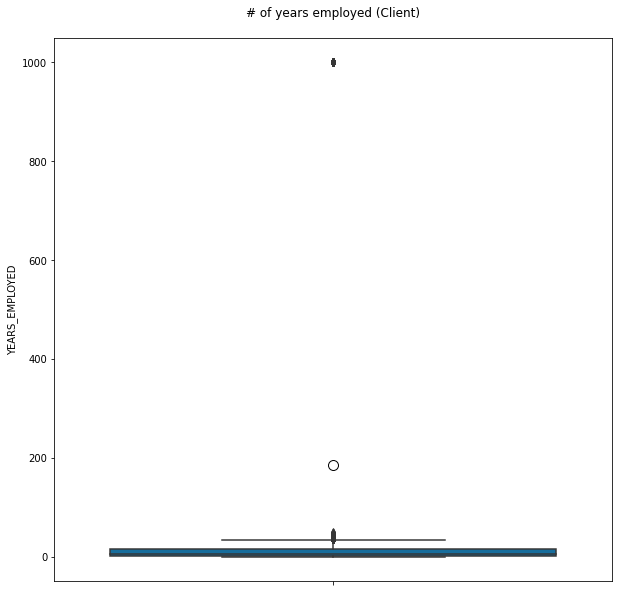

In [31]:
#Creating a boxplot to identify outliers: YEARS_EMPLOYED
plt.figure(figsize=(10,10))
years_employed = sns.boxplot(y='YEARS_EMPLOYED',data=applicant,showmeans=True,palette="colorblind",meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title('# of years employed (Client)\n')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [32]:
applicant['YEARS_EMPLOYED'].value_counts()

1000    55374
1       31841
2       29648
0       27904
3       25107
4       21767
5       16271
6       15051
7       13148
8       11440
9        8980
10       7364
11       5902
12       5309
14       4643
13       4349
15       2725
16       2335
17       2006
18       1918
19       1871
20       1600
21       1461
22       1253
23       1016
24        914
25        821
27        656
26        653
28        611
29        567
30        457
31        437
34        364
32        351
33        331
35        257
36        196
37        138
39        125
38        116
40         59
41         59
42         42
44         31
43         19
45         14
48          4
46          4
49          1
47          1
Name: YEARS_EMPLOYED, dtype: int64

There's a huge number of Years_Employed with 1000 year values. They would all be incorrect or some kind of a place holder maybe. 

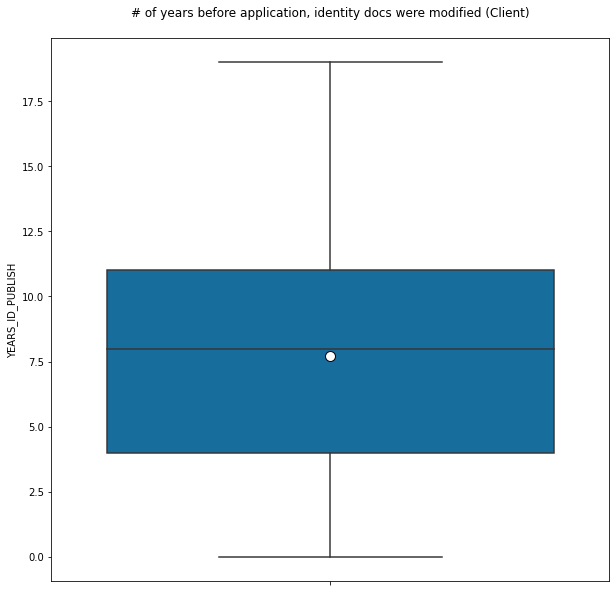

In [33]:
#Creating a boxplot to identify outliers: YEARS_ID_PUBLISH
plt.figure(figsize=(10,10))
years_employed = sns.boxplot(y='YEARS_ID_PUBLISH',data=applicant,showmeans=True,palette="colorblind",meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title('# of years before application, identity docs were modified (Client)\n')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

There dont seem to be any outliers with YEARS_ID_PUBLISH as demonstrated with the boxplot and the fact that teh median and mean are so close to each other

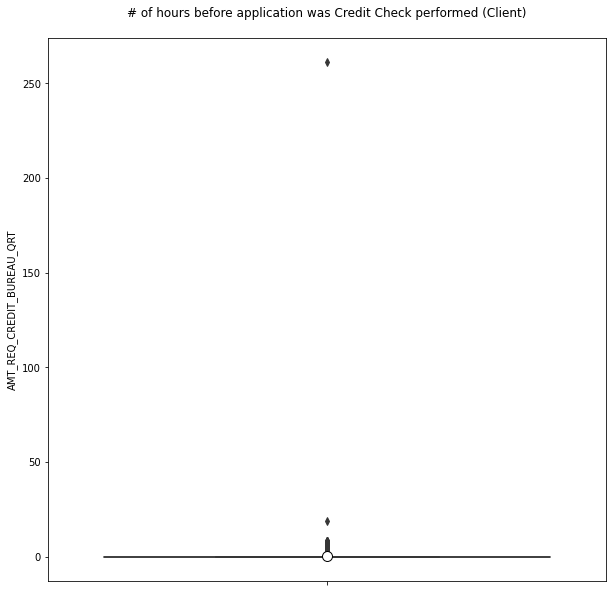

In [34]:
#Creating a boxplot to identify outliers: AMT_REQ_CREDIT_BUREAU_QRT
plt.figure(figsize=(10,10))
years_employed = sns.boxplot(y='AMT_REQ_CREDIT_BUREAU_QRT',data=applicant,showmeans=True,palette="colorblind",meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title('# of hours before application was Credit Check performed (Client)\n')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The above value of over 250 looks like an outlier based on the boxplot since it's so far off

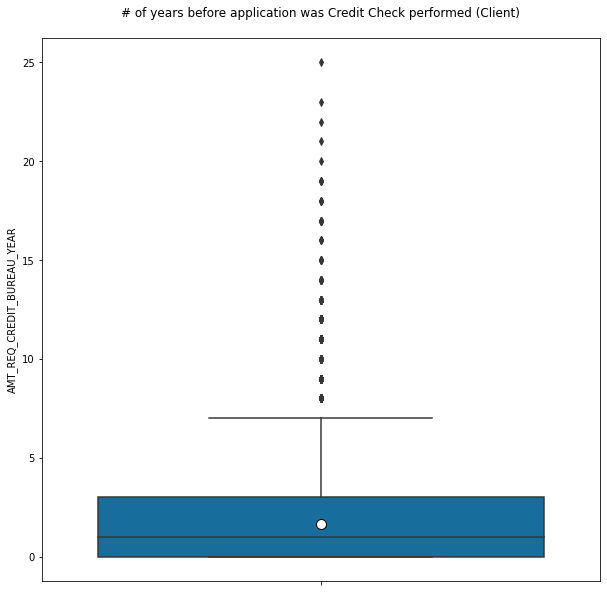

In [35]:
#Creating a boxplot to identify outliers: AMT_REQ_CREDIT_BUREAU_YEAR
plt.figure(figsize=(10,10))
years_employed = sns.boxplot(y='AMT_REQ_CREDIT_BUREAU_YEAR',data=applicant,showmeans=True,palette="colorblind",meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title('# of years before application was Credit Check performed (Client)\n')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The data split on the above boxplot seems to be more gradual and hence there's no definite identifiable outliers (the # 25 could qualify as one, but not too sure)

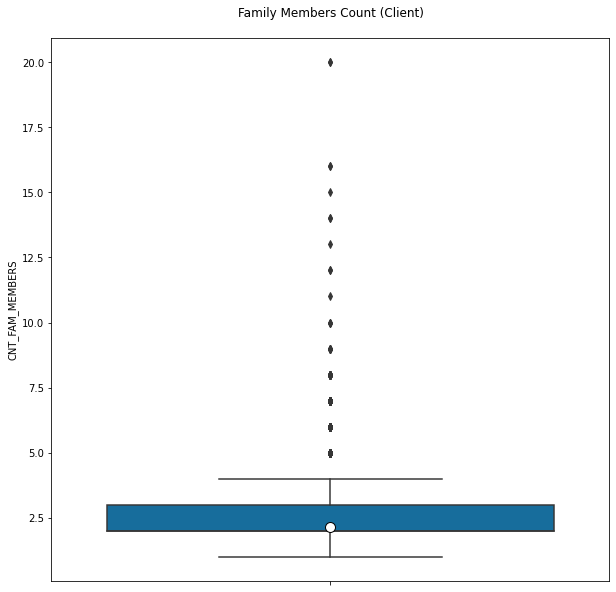

In [36]:
#Creating a boxplot to identify outliers: CNT_FAM_MEMBERS
plt.figure(figsize=(10,10))
years_employed = sns.boxplot(y='CNT_FAM_MEMBERS',data=applicant,showmeans=True,palette="colorblind",meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title('Family Members Count (Client)\n')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [37]:
applicant['CNT_FAM_MEMBERS'].describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

The above plot shows one outlier with 20 family members although, the median and mean are pretty close to 2

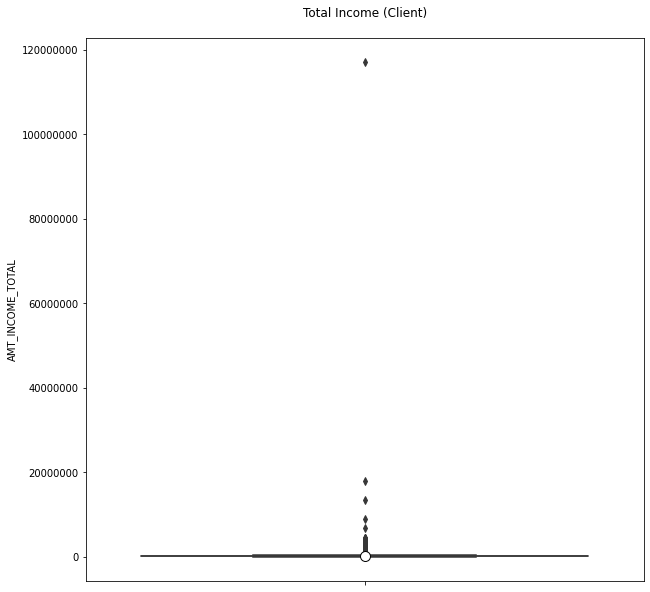

In [38]:
#Creating a boxplot to identify outliers: AMT_INCOME_TOTAL
plt.figure(figsize=(10,10))
years_employed = sns.boxplot(y='AMT_INCOME_TOTAL',data=applicant,showmeans=True,palette="colorblind",meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title('Total Income (Client)\n')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [39]:
applicant[applicant['AMT_INCOME_TOTAL']>40000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,...,0,0,Business Entity Type 3,0.113161,0,0,0,0,0,1


There's a clearly visible single outlier for Income Total, and it comes as surprise they are unable to pay back the loan, given the scredited amount and goods price is considerably low

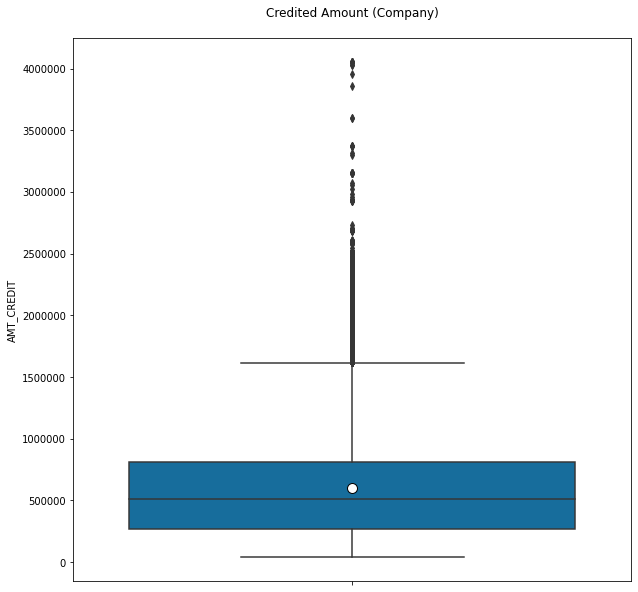

In [40]:
#Creating a boxplot to identify outliers: AMT_CREDIT
plt.figure(figsize=(10,10))
years_employed = sns.boxplot(y='AMT_CREDIT',data=applicant,showmeans=True,palette="colorblind",meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title('Credited Amount (Company)\n')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [41]:
applicant[applicant['AMT_CREDIT']>3000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
14643,117085,0,Cash loans,F,749331.0,3956274.0,197230.5,3825000.0,Unaccompanied,Commercial associate,...,0,0,Business Entity Type 3,0.777754,0,0,0,0,0,1
14852,117337,0,Cash loans,M,760846.5,4050000.0,146002.5,4050000.0,Unaccompanied,Commercial associate,...,0,0,Trade: type 7,0.639547,0,0,0,0,0,0
17948,120926,0,Cash loans,M,783000.0,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,...,1,1,Industry: type 4,0.706927,0,0,0,0,0,0
32099,137220,0,Cash loans,M,337500.0,3150000.0,79632.0,3150000.0,NaN,Commercial associate,...,1,1,Business Entity Type 3,0.609989,0,0,0,0,0,0
53936,162494,0,Cash loans,M,900450.0,3600000.0,91008.0,3600000.0,Unaccompanied,Commercial associate,...,0,0,Business Entity Type 3,0.694477,0,0,0,1,0,0
87956,202108,1,Cash loans,F,229500.0,3020760.0,79816.5,2700000.0,Unaccompanied,Commercial associate,...,0,0,Business Entity Type 3,0.435396,0,0,0,0,0,1
95571,210956,0,Cash loans,M,430650.0,4031032.5,102033.0,3712500.0,Unaccompanied,Working,...,1,1,Business Entity Type 3,0.447749,0,0,0,0,0,0
98646,214538,0,Cash loans,F,405000.0,3150000.0,79632.0,3150000.0,Unaccompanied,Commercial associate,...,0,0,Trade: type 6,0.732730,0,0,1,0,1,2
104577,221360,0,Cash loans,M,468000.0,3600000.0,91138.5,3600000.0,NaN,State servant,...,0,0,Security Ministries,0.283373,0,0,0,0,0,0
110459,228135,0,Cash loans,M,864900.0,4050000.0,102384.0,4050000.0,Unaccompanied,Commercial associate,...,0,0,Business Entity Type 3,0.280597,0,0,0,4,0,0


From viewing the filtered dataframe above, the values seems consistent and there doesn't seem to be any eye-catching number errors. These values that looked like outliers are probably good.

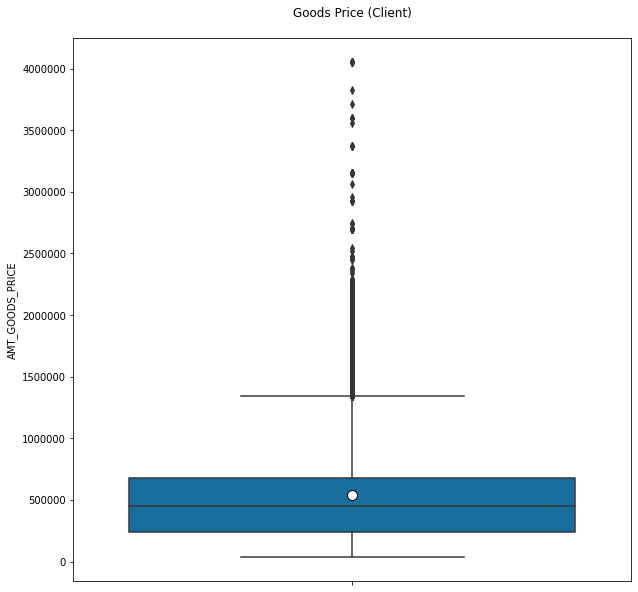

In [42]:
#Creating a boxplot to identify outliers: AMT_GOODS_PRICE
plt.figure(figsize=(10,10))
years_employed = sns.boxplot(y='AMT_GOODS_PRICE',data=applicant,showmeans=True,palette="colorblind",meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"})
plt.title('Goods Price (Client)\n')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

There doesn;t seem to be any eye-catching outliers based on this plot, even thought the mean and median are slightly differring

#### DATA IMBALANCE RATIO
This imbalance can be shown for both the target and also gender

In [43]:
applicant['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [44]:
#Check XNAs
applicant[applicant['CODE_GENDER']=="XNA"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,...,0,0,Business Entity Type 1,0.295998,0,0,0,0,0,1
38566,144669,0,Revolving loans,XNA,157500.0,270000.0,13500.0,225000.0,Family,Working,...,0,0,Industry: type 3,0.709205,0,0,0,3,0,4
83382,196708,0,Revolving loans,XNA,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,...,0,0,Kindergarten,0.659185,0,0,0,0,0,3
189640,319880,0,Revolving loans,XNA,247500.0,540000.0,27000.0,900000.0,Unaccompanied,Commercial associate,...,0,0,Medicine,0.658620,0,0,0,0,1,6


The above values 'XNA' were missed in the data cleanup section, but the ratio is so small that it could be changed to F, based on what is shown in the filtered dataframe

In [45]:
#Change XNA to F
applicant.CODE_GENDER = applicant.CODE_GENDER.str.replace('XNA','F')
applicant.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

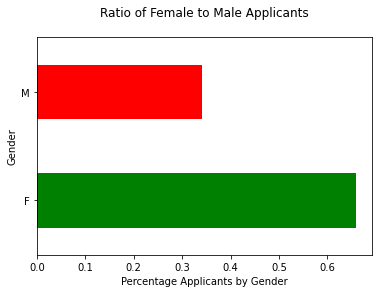

In [46]:
applicant['CODE_GENDER'].value_counts(normalize=True).plot.barh(color=['g','r'])
plt.title('Ratio of Female to Male Applicants\n')
plt.xlabel('Percentage Applicants by Gender')
plt.ylabel('Gender')
plt.show()

In [47]:
applicant.CODE_GENDER.value_counts()[1]/applicant.CODE_GENDER.value_counts()[0]

0.5189328828561832

There's higher number of female appplicants in the dataset, which could mean that any segmented analysis might show 'higher values' for females. The ratio is 2:1 (F:M)

Data Imbalance ratio for Target Variable

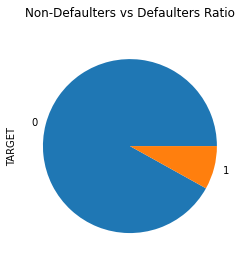

In [48]:
plt.title('Non-Defaulters vs Defaulters Ratio\n')
applicant['TARGET'].value_counts().plot.pie()
plt.show()

In [49]:
applicant['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

There's 91% values realting to non-defaulting cases, while the remaining for default cases.

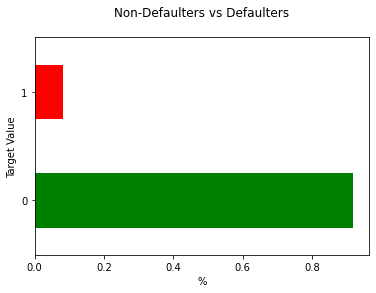

In [50]:
applicant['TARGET'].value_counts(normalize=True).plot.barh(color=['g','r'])
plt.title('Non-Defaulters vs Defaulters\n')
plt.xlabel('%')
plt.ylabel('Target Value')
plt.show()

In [51]:
applicant.TARGET.value_counts()[0]/applicant.TARGET.value_counts()[1]

11.387150050352467

The data imbalance ratio for target variable is 11.39:1 (0:1). There's a lot more data for non-defaulters than defaulters. This bias might affect identification of loan defaulter patterns

#### BINNING

In [52]:
applicant.nunique()

SK_ID_CURR                     307511
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
AGE                                50
YEARS_EMPLOYED                     51
YEARS_ID_PUBLISH                   19
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
OCCUPATION_TYPE                    18
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_

Adding new columns (mainly Binning, where possible, for analysis simplicity (Good for heatmaps or Histograms or general visibility)). Might be a good idea to bin the Age, Years Employed, Income, Credit, Goods Price

In [53]:
#Binning
applicant['age_bins'] = pd.cut(applicant['AGE'], [20,30, 40,50,60,70],['20-30','30-40','40-50','50-60','60-70','70+'])
applicant['Years_emp_bins'] = pd.cut(applicant['YEARS_EMPLOYED'],[0,10,20,30, 40,50,60,1500],['0-10','10-20','20-30','30-40','40-50','50-60','Outliers'])
applicant['Income_bins'] = pd.cut(applicant['AMT_INCOME_TOTAL'], [0,50000,100000,200000,300000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000],['0-50000','50000-100000','100000-200000','200000-300000','300000-500000','500000-750000','750000-1000000','1000000-1250000','1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000+'])
applicant['Credit_bins'] = pd.cut(applicant['AMT_CREDIT'], [0,50000,100000,200000,300000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,2500000,2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,6000000,7000000,8000000],['0-50000','50000-100000','100000-200000','200000-300000','300000-500000','500000-750000','750000-1000000','1000000-1250000','1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000','2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000','3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000+'])
applicant['GoodPrice_bins'] = pd.cut(applicant['AMT_GOODS_PRICE'], [0,50000,100000,200000,300000,500000,750000,1000000,1250000,1500000,1750000,2000000,2250000,2500000,2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,6000000],['0-50000','50000-100000','100000-200000','200000-300000','300000-500000','500000-750000','750000-1000000','1000000-1250000','1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000','2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000','3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000','5000000-6000000','6000000+'])


#### UNIVARIATE & BIVARIATE ANALYSIS

Since we would be comparing all ours variables with the Target column, it might be a good idea to split the applicant dataframe into 2 based on the uniques in target

In [54]:
applicant_0 = applicant[applicant['TARGET']==0]
applicant_1 = applicant[applicant['TARGET']==1]

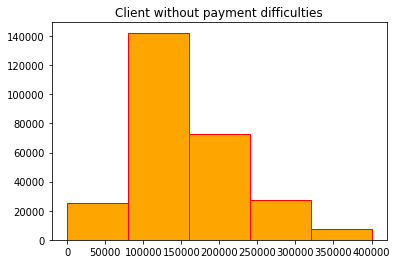

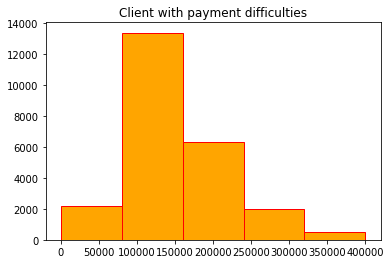

In [55]:
plt.hist(applicant_0['AMT_INCOME_TOTAL'],bins=5,range=[0,400000],edgecolor='red',color='Orange')
plt.title('Client without payment difficulties')
plt.show()

plt.hist(applicant_1['AMT_INCOME_TOTAL'],bins=5,range=[0,400000],edgecolor='red',color='Orange')
plt.title('Client with payment difficulties')
plt.show()


From the above plots, there doesn't seem to be a visible correlation between defaulting and income

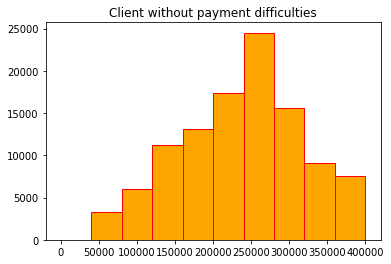

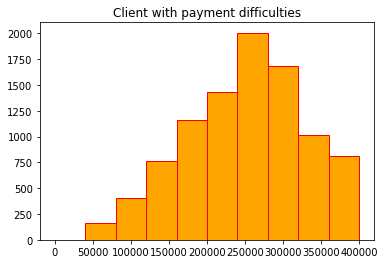

In [56]:
plt.hist(applicant_0['AMT_CREDIT'],bins=10,range=[0,400000],edgecolor='red',color='Orange')
plt.title('Client without payment difficulties')
plt.show()

plt.hist(applicant_1['AMT_CREDIT'],bins=10,range=[0,400000],edgecolor='red',color='Orange')
plt.title('Client with payment difficulties')
plt.show()


From the above plots, there doesn't seem to be a visible correlation between defaulting and credited amount

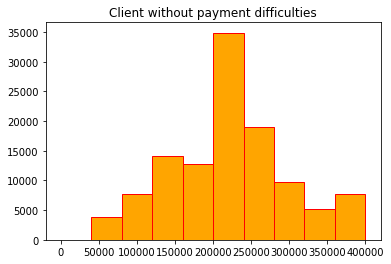

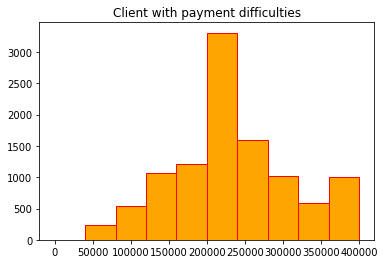

In [57]:
plt.hist(applicant_0['AMT_GOODS_PRICE'],bins=10,range=[0,400000],edgecolor='red',color='Orange')
plt.title('Client without payment difficulties')
plt.show()

plt.hist(applicant_1['AMT_GOODS_PRICE'],bins=10,range=[0,400000],edgecolor='red',color='Orange')
plt.title('Client with payment difficulties')
plt.show()


From the above plots, there doesn't seem to be a visible correlation between defaulting and Goods Price,except for a small difference in the 150K-200K range, where the goods valaue in that price range seems to ahve a higher default rate

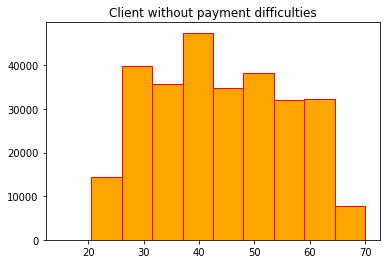

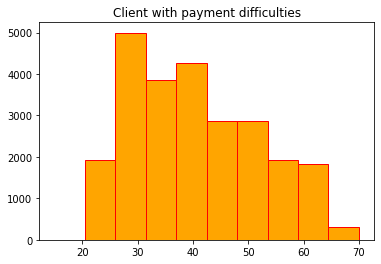

In [58]:
plt.hist(applicant_0['AGE'],bins=10,range=[15,70],edgecolor='red',color='Orange')
plt.title('Client without payment difficulties')
plt.show()

plt.hist(applicant_1['AGE'],bins=10,range=[15,70],edgecolor='red',color='Orange')
plt.title('Client with payment difficulties')
plt.show()

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


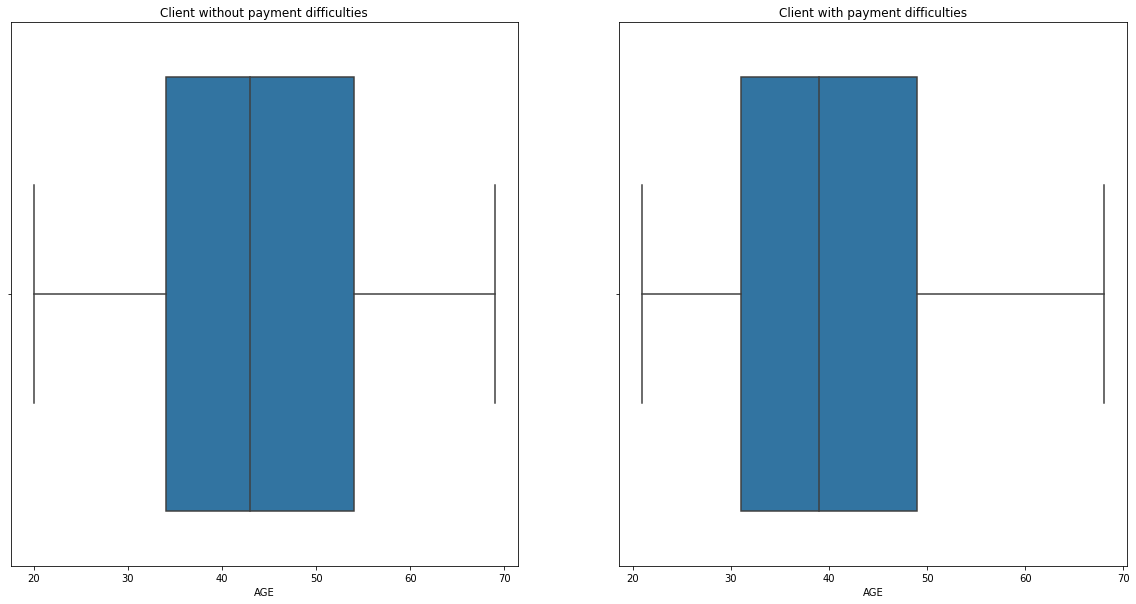

In [59]:
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.boxplot(applicant_0['AGE'])
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(applicant_1['AGE'])
plt.title('Client with payment difficulties')
plt.show()

Based on the histogram and boxplot, we can say that people slightly older than a median of 40 years of age have lower default rates than otherwise

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


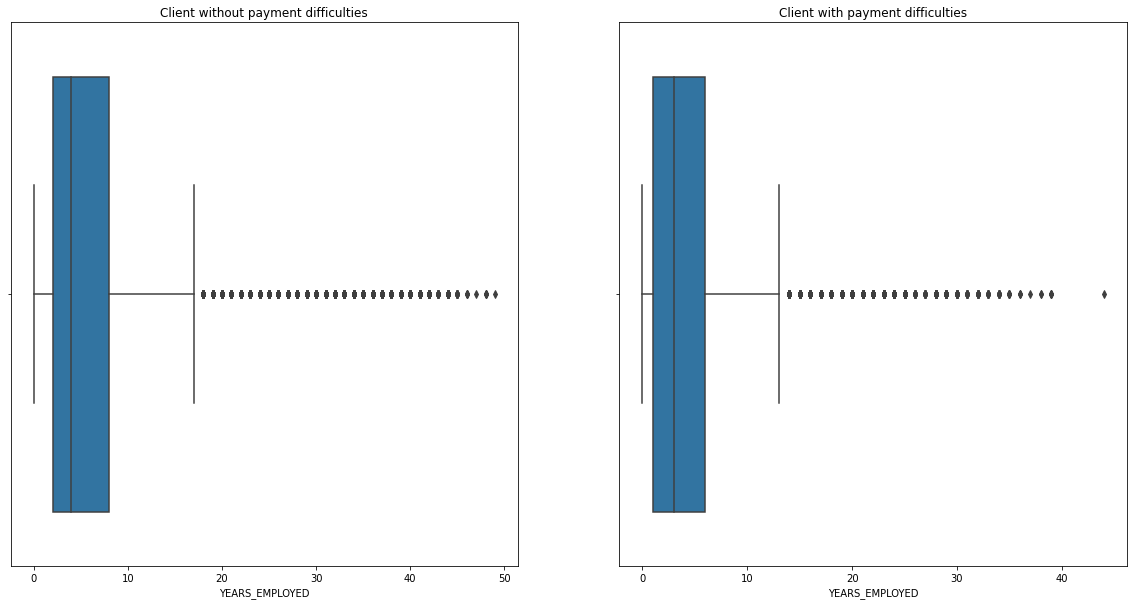

In [60]:
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.boxplot(applicant_0[applicant_0['YEARS_EMPLOYED']<1000]['YEARS_EMPLOYED'])
plt.title('Client without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(applicant_1[applicant_1['YEARS_EMPLOYED']<1000]['YEARS_EMPLOYED'])
plt.title('Client with payment difficulties')
plt.show()

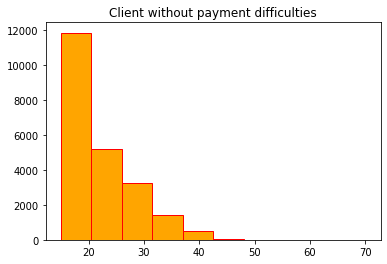

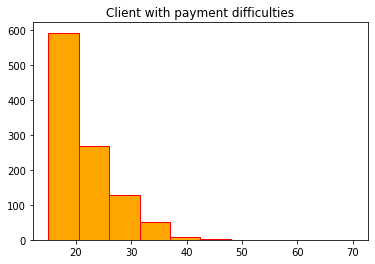

In [61]:
plt.hist(applicant_0['YEARS_EMPLOYED'],bins=10,range=[15,70],edgecolor='red',color='Orange')
plt.title('Client without payment difficulties')
plt.show()

plt.hist(applicant_1['YEARS_EMPLOYED'],bins=10,range=[15,70],edgecolor='red',color='Orange')
plt.title('Client with payment difficulties')
plt.show()

As for Years of employment, it's just the one outlier with the highest age that seems to be defaulting. Else, there isn't much to analyze

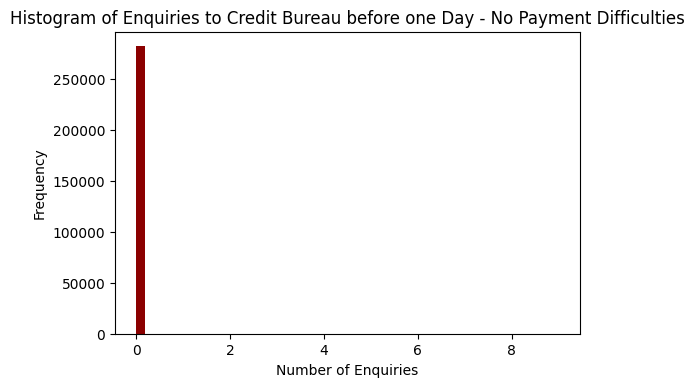

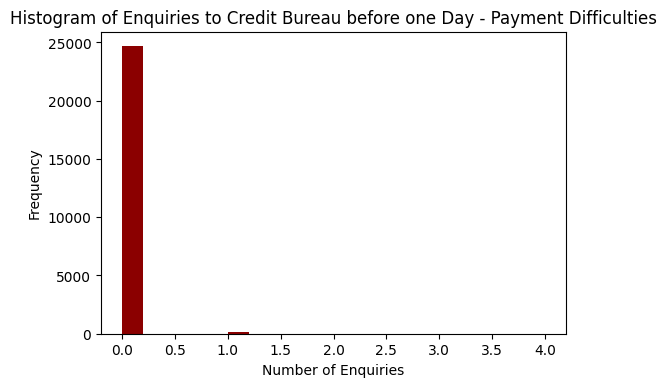

In [62]:
plt.figure(dpi=100)
plt.hist(applicant_0['AMT_REQ_CREDIT_BUREAU_DAY'], color='darkred', bins=4, width=0.2)
plt.title("Histogram of Enquiries to Credit Bureau before one Day - No Payment Difficulties")
plt.xlabel("Number of Enquiries")
plt.ylabel("Frequency")
plt.show()

plt.figure(dpi=100)
plt.hist(applicant_1['AMT_REQ_CREDIT_BUREAU_DAY'], color='darkred', bins=4, width=0.2)
plt.title("Histogram of Enquiries to Credit Bureau before one Day - Payment Difficulties")
plt.xlabel("Number of Enquiries")
plt.ylabel("Frequency")
plt.show()

There doesn't seem to be a significant correlation between # of enquiries to credit bureau a day before vs Target variable.

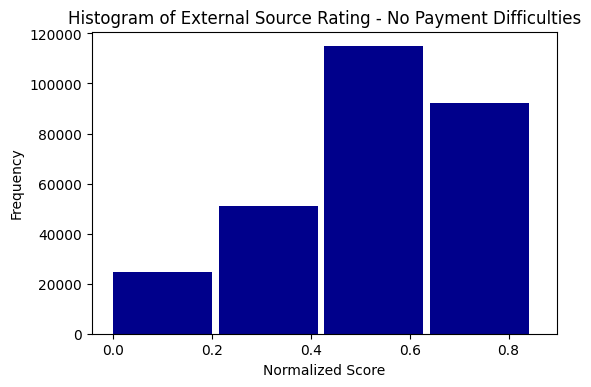

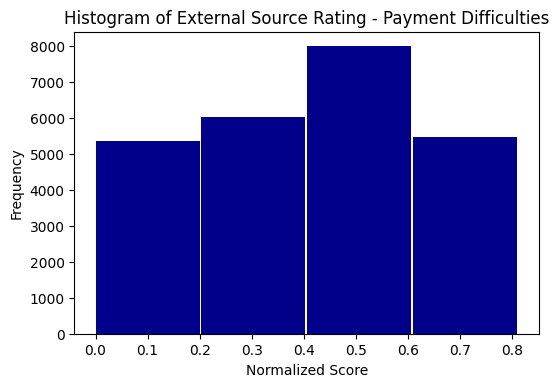

In [63]:
plt.figure(dpi=100)
plt.hist(applicant_0['EXT_SOURCE_2'], color='darkblue', bins=4, width=0.2)
plt.title("Histogram of External Source Rating - No Payment Difficulties")
plt.xlabel("Normalized Score")
plt.ylabel("Frequency")
plt.show()

plt.figure(dpi=100)
plt.hist(applicant_1['EXT_SOURCE_2'], color='darkblue', bins=4, width=0.2)
plt.title("Histogram of External Source Rating - Payment Difficulties")
plt.xlabel("Normalized Score")
plt.ylabel("Frequency")
plt.show()

It seems that we might benefit from reviewing the lower scores awarded by external source to various applications, as those applications seem to be defaulting.
As far as higher ratings go, there isn't much useful correlation.

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


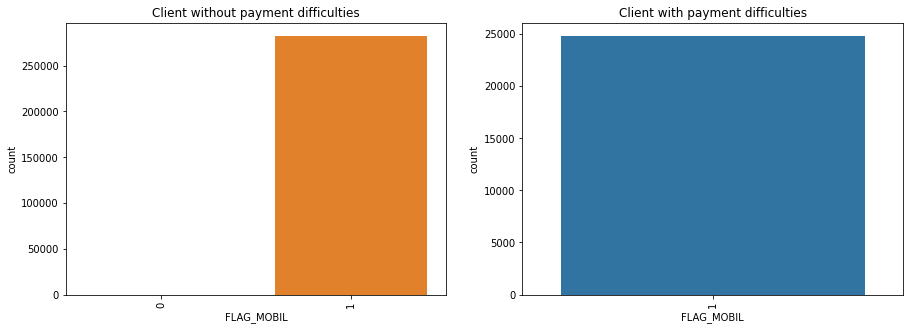

In [64]:
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(applicant_0['FLAG_MOBIL'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(applicant_1['FLAG_MOBIL'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [65]:
(applicant_0['FLAG_MOBIL'].value_counts()/applicant_1['FLAG_MOBIL'].value_counts()).sort_values(ascending=False)
applicant_0['FLAG_MOBIL'].value_counts()

1    282685
0         1
Name: FLAG_MOBIL, dtype: int64

There isn't a major correlation between people giving out their mobile numbers and otherwise, although it seems completely absent with the people having difficulties making their payments

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


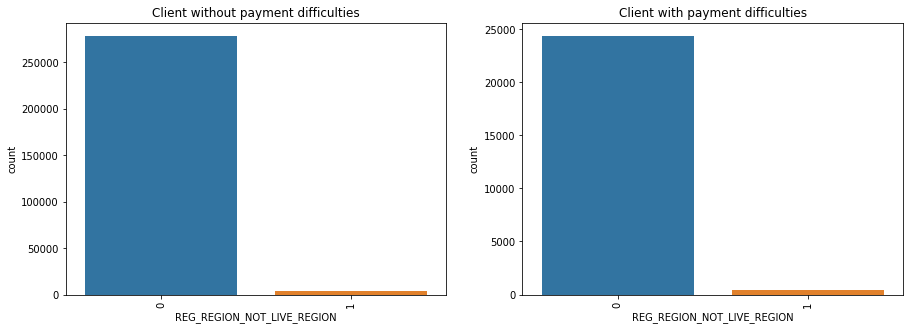

In [66]:
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(applicant_0['REG_REGION_NOT_LIVE_REGION'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(applicant_1['REG_REGION_NOT_LIVE_REGION'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


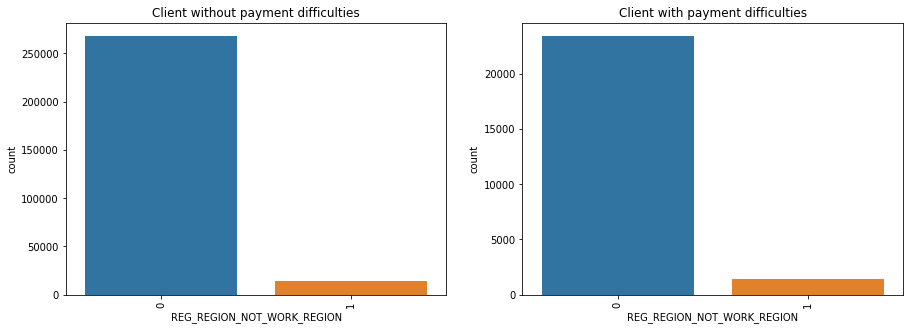

In [67]:
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(applicant_0['REG_REGION_NOT_WORK_REGION'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(applicant_1['REG_REGION_NOT_WORK_REGION'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

The 2 subplots above show that address doesn't have any bearing on Default rate

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


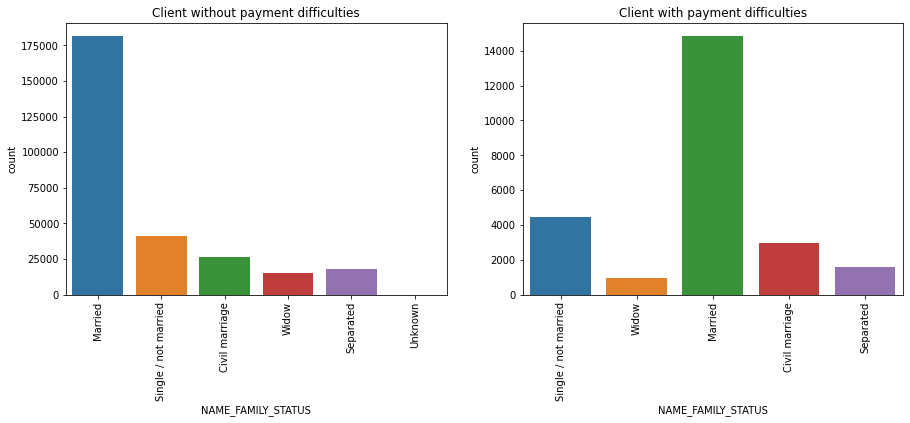

In [68]:
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(applicant_0['NAME_FAMILY_STATUS'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(applicant_1['NAME_FAMILY_STATUS'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [69]:
applicant_0['NAME_FAMILY_STATUS'].value_counts()/applicant_1['NAME_FAMILY_STATUS'].value_counts()

Civil marriage           9.055724
Married                 12.227744
Separated               11.203704
Single / not married     9.196096
Unknown                       NaN
Widow                   16.169691
Name: NAME_FAMILY_STATUS, dtype: float64

From the plots and ratios above, we can tell that Married/Separated /Widows are more likely to not default on their payments

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


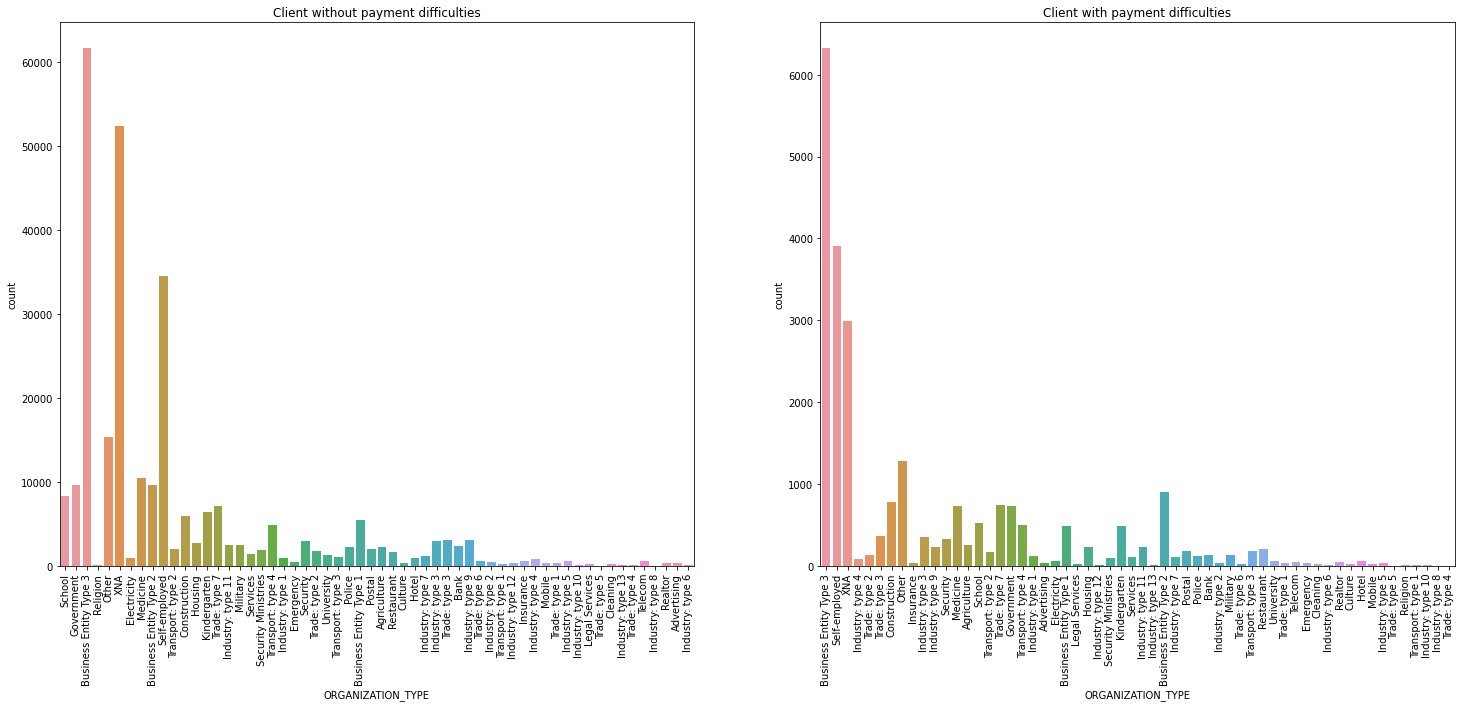

In [70]:
plt.figure(figsize=(25,10)) 
plt.subplot(1,2,1)
ax = sns.countplot(applicant_0['ORGANIZATION_TYPE'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(applicant_1['ORGANIZATION_TYPE'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [71]:
(applicant_0['ORGANIZATION_TYPE'].value_counts()/applicant_1['ORGANIZATION_TYPE'].value_counts()).sort_values(ascending=False)

Trade: type 4             31.000000
Industry: type 12         25.357143
Transport: type 1         21.333333
Trade: type 6             20.758621
Security Ministries       19.562500
University                19.415385
Police                    19.008547
Military                  18.511111
Bank                      18.284615
XNA                       17.519732
Culture                   17.047619
Insurance                 16.558824
Religion                  16.000000
School                    15.906844
Trade: type 5             15.333333
Hotel                     14.580645
Industry: type 10         14.571429
Medicine                  14.187246
Services                  14.144231
Electricity               14.079365
Industry: type 9          13.968889
Industry: type 5          13.609756
Government                13.330579
Trade: type 2             13.285714
Kindergarten              13.214876
Emergency                 13.000000
Industry: type 6          13.000000
Industry: type 2          12

Based on the subplot and ratios above, we could probably say that Trade: Type 4 has the maximum non-default rates, but there isn't enough data to conclusively say that

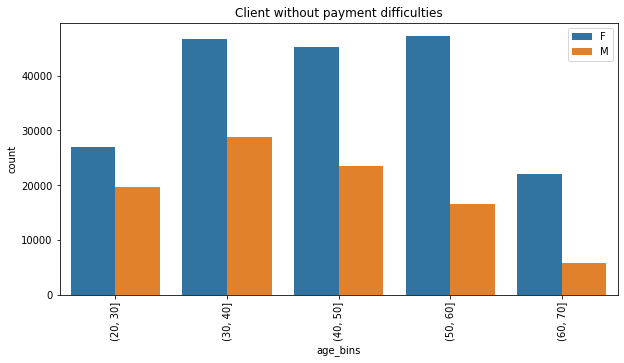

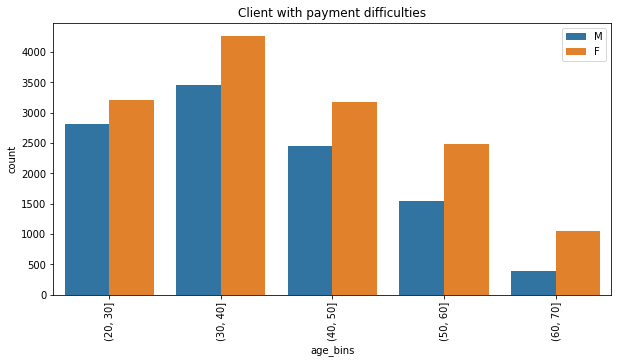

In [72]:
#Gender vs Age vs target
plt.figure(figsize=(10,5)) 
sns.countplot(data=applicant_0,x='age_bins', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Client without payment difficulties')
plt.show()

plt.figure(figsize=(10,5)) 
sns.countplot(data=applicant_1,x='age_bins', hue='CODE_GENDER')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.title('Client with payment difficulties')
plt.show()

Females seem to have a harder time with repayment than males according to the countplot. But, we mustn't forget that this data is more biased towards females applicants.

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


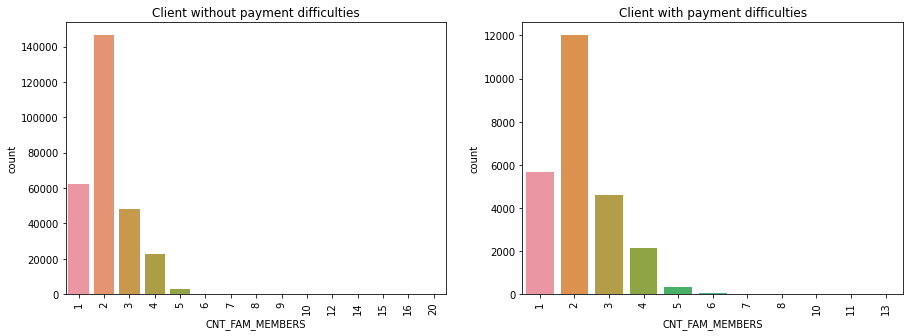

In [73]:
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(applicant_0['CNT_FAM_MEMBERS'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(applicant_1['CNT_FAM_MEMBERS'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

The actual ratio of clients who are able to pay up the loan amount ans otherwise is very similar, regardless of family size. We cannot make any recommendations based on this plot

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


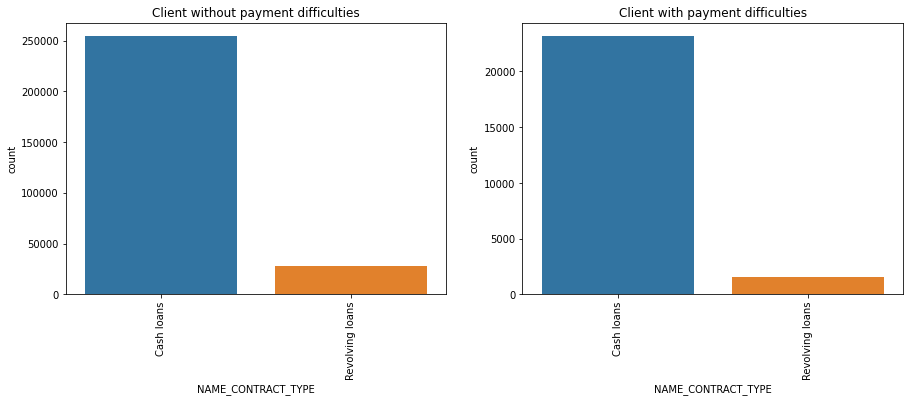

In [74]:
plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(applicant_0['NAME_CONTRACT_TYPE'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(applicant_1['NAME_CONTRACT_TYPE'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [75]:
applicant_0['NAME_CONTRACT_TYPE'].value_counts()/applicant_1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         10.981913
Revolving loans    17.253741
Name: NAME_CONTRACT_TYPE, dtype: float64

It seems that more cash loans were given out than revolving loans. As a ratio though, reolvving loans seem to be a lot less risky. The # of cash loans that haven't faced default is only 10 times the default rates, while it is 17 times for the Revolving loans

c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ru1457\pycharmprojects\untitled\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


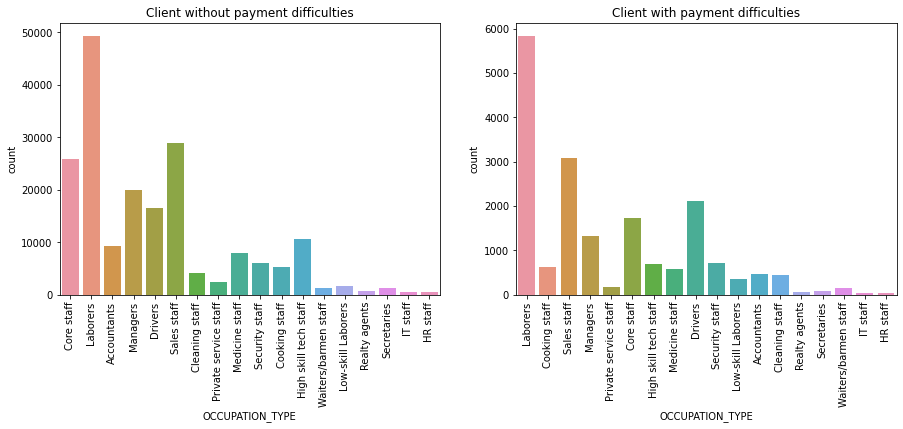

In [76]:

plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax = sns.countplot(applicant_0['OCCUPATION_TYPE'])
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(applicant_1['OCCUPATION_TYPE'])
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()


In [77]:
applicant_0['OCCUPATION_TYPE'].value_counts()/applicant_1['OCCUPATION_TYPE'].value_counts()

Accountants              19.702532
Cleaning staff            9.409396
Cooking staff             8.574879
Core staff               14.863061
Drivers                   7.829141
HR staff                 14.638889
High skill tech staff    15.233951
IT staff                 14.470588
Laborers                  8.452895
Low-skill Laborers        4.830084
Managers                 15.092620
Medicine staff           13.924825
Private service staff    14.154286
Realty agents            11.728814
Sales staff               9.382277
Secretaries              13.184783
Security staff            8.308864
Waiters/barmen staff      7.868421
Name: OCCUPATION_TYPE, dtype: float64

Accountants and Managers seems to have the best non-default rates, while Laborers, Waiters, Drivers seem to have the worst

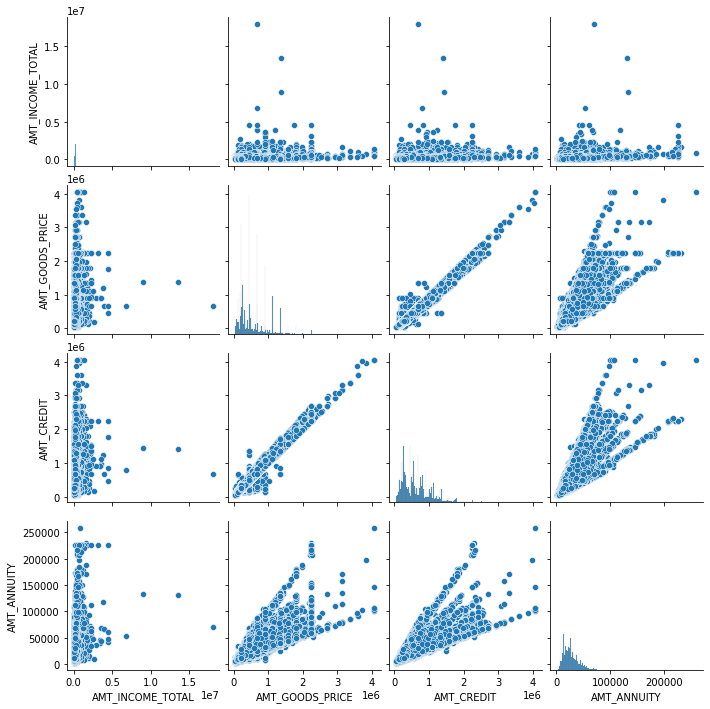

In [78]:
sns.pairplot(applicant_0[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY']])
plt.show()


For people with no defaulting
- We can see that for the most part, as your Goods_Price increses, the Credited amount also increases.
- Increasing income doesn't relate to a higher credited amount or goods price. Infact, Lower income values have higher loans (which makes sense)
- It seems that even for the case of annuity, lower income bracket seems to be paying higher - due to higher loans of course

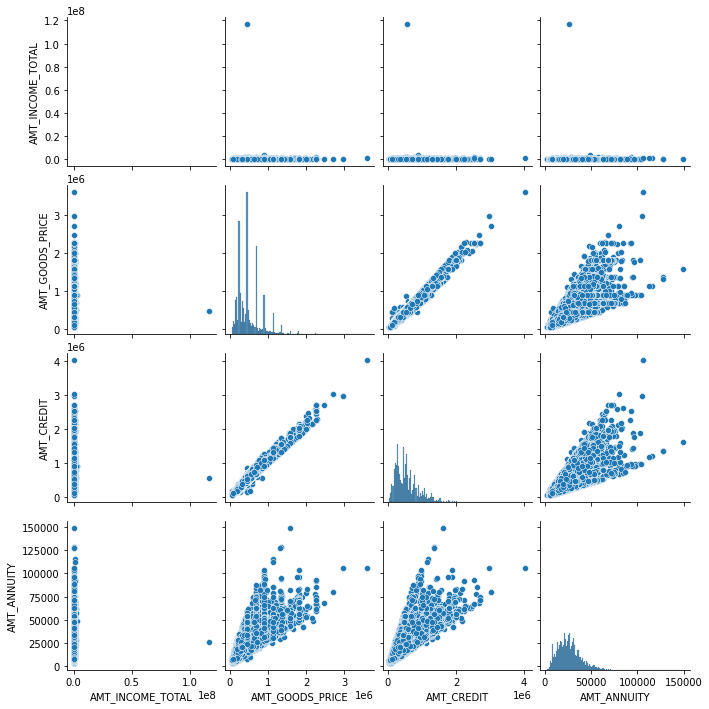

In [79]:

sns.pairplot(applicant_1[['AMT_INCOME_TOTAL','AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY']])
plt.show()


For people with defaulting
- The charts for defaulting and non-defaulting cases are very similar. The only differences are most likely due to the data imbalance


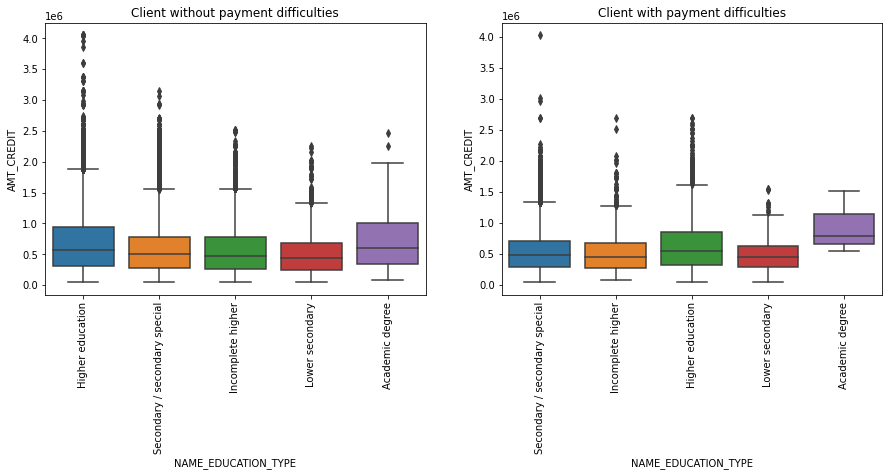

In [80]:

plt.figure(figsize=(15,5)) 
plt.subplot(1,2,1)
ax = sns.boxplot(data=applicant_0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=applicant_1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()


There's a clear indication on the chart that a person with an Academic Degree will have higher defualt rate, perhaps also due to the disbursement of higher loan amounts

#### CORRELATION MAPS

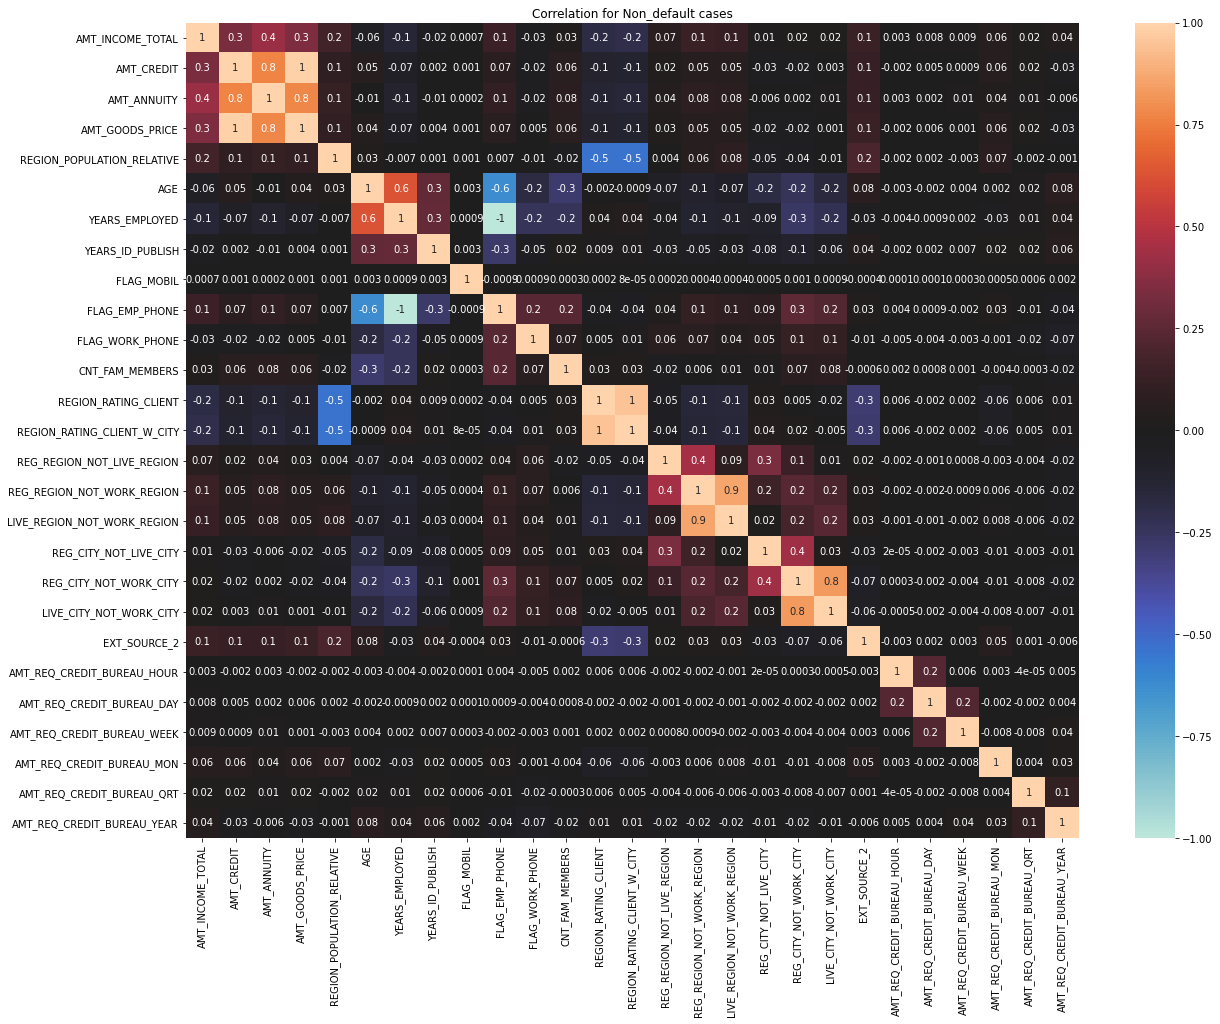

In [81]:

#No Payment Difficulties
plt.figure(figsize=(20,15)) 
sns.heatmap(applicant_0.corr(),annot=True,fmt='.1g', vmin=-1, vmax=1, center= 0)
plt.title('Correlation for Non_default cases')
plt.show()


TOP 10 CORRELATORS - No Payment Difficulties

In [82]:

corr0 = applicant_0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','AGE','YEARS_ID_PUBLISH','AMT_CREDIT','EXT_SOURCE_2','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY']].corr()
corr_df1 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool))
corr_df1 = corr_df1.unstack().reset_index().dropna(subset = [0])
corr_df1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df1['Corr_abs'] = abs(corr_df1['Correlation_Value'])
corr_df1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df1.head(10)


,VAR1,VAR2,Correlation_Value,Corr_abs
66,AMT_CREDIT,AMT_GOODS_PRICE,0.987022,0.987022
22,AMT_ANNUITY,AMT_GOODS_PRICE,0.776421,0.776421
68,AMT_CREDIT,AMT_ANNUITY,0.771297,0.771297
47,AGE,YEARS_EMPLOYED,0.626028,0.626028
23,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418948,0.418948
11,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.349426,0.349426
67,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
92,CNT_FAM_MEMBERS,AGE,-0.285804,0.285804
58,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.276254,0.276254
59,YEARS_ID_PUBLISH,AGE,0.270032,0.270032


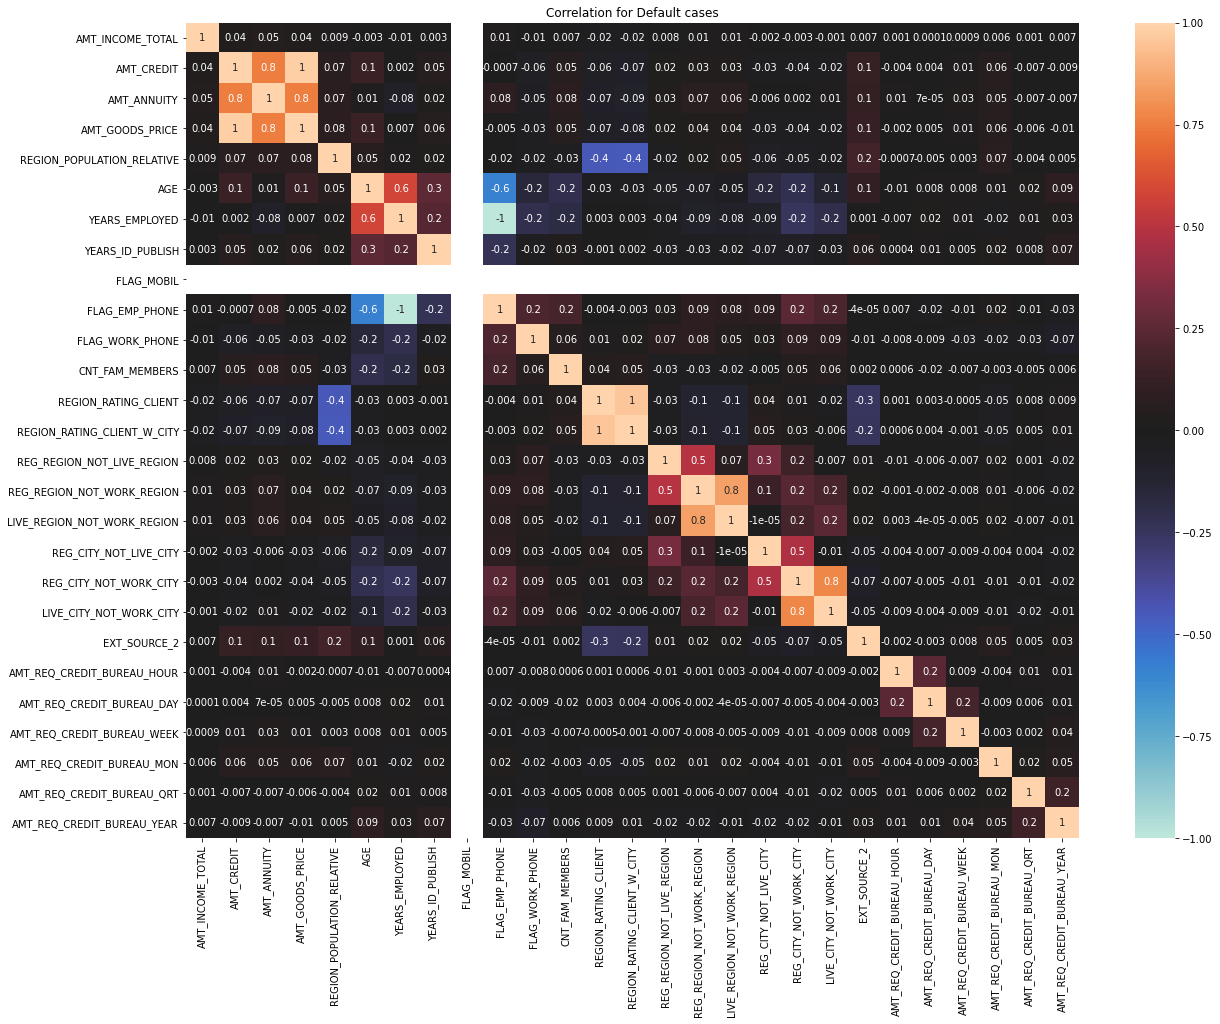

In [83]:

#With Payment Difficulties
plt.figure(figsize=(20,15)) 
sns.heatmap(applicant_1.corr(),annot=True,fmt='.1g', vmin=-1, vmax=1, center= 0)
plt.title('Correlation for Default cases')
plt.show()


TOP 10 CORRELATORS - With Payment Difficulties

In [84]:

corr1 = applicant_1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','AGE','YEARS_ID_PUBLISH','AMT_CREDIT','EXT_SOURCE_2','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY']].corr()
corr_df2 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
corr_df2 = corr_df2.unstack().reset_index().dropna(subset = [0])
corr_df2.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df2['Corr_abs'] = abs(corr_df2['Correlation_Value'])
corr_df2.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df2.head(10)


,VAR1,VAR2,Correlation_Value,Corr_abs
66,AMT_CREDIT,AMT_GOODS_PRICE,0.982783,0.982783
22,AMT_ANNUITY,AMT_GOODS_PRICE,0.752295,0.752295
68,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
47,AGE,YEARS_EMPLOYED,0.582443,0.582443
59,YEARS_ID_PUBLISH,AGE,0.252339,0.252339
119,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.247511,0.247511
58,YEARS_ID_PUBLISH,YEARS_EMPLOYED,0.229150,0.229150
92,CNT_FAM_MEMBERS,AGE,-0.203403,0.203403
91,CNT_FAM_MEMBERS,YEARS_EMPLOYED,-0.186516,0.186516
44,AGE,AMT_GOODS_PRICE,0.135532,0.135532


The top 3 correaltors for both cases above are the same.
What about not including the Target variable this time? What would the top 3 be then?

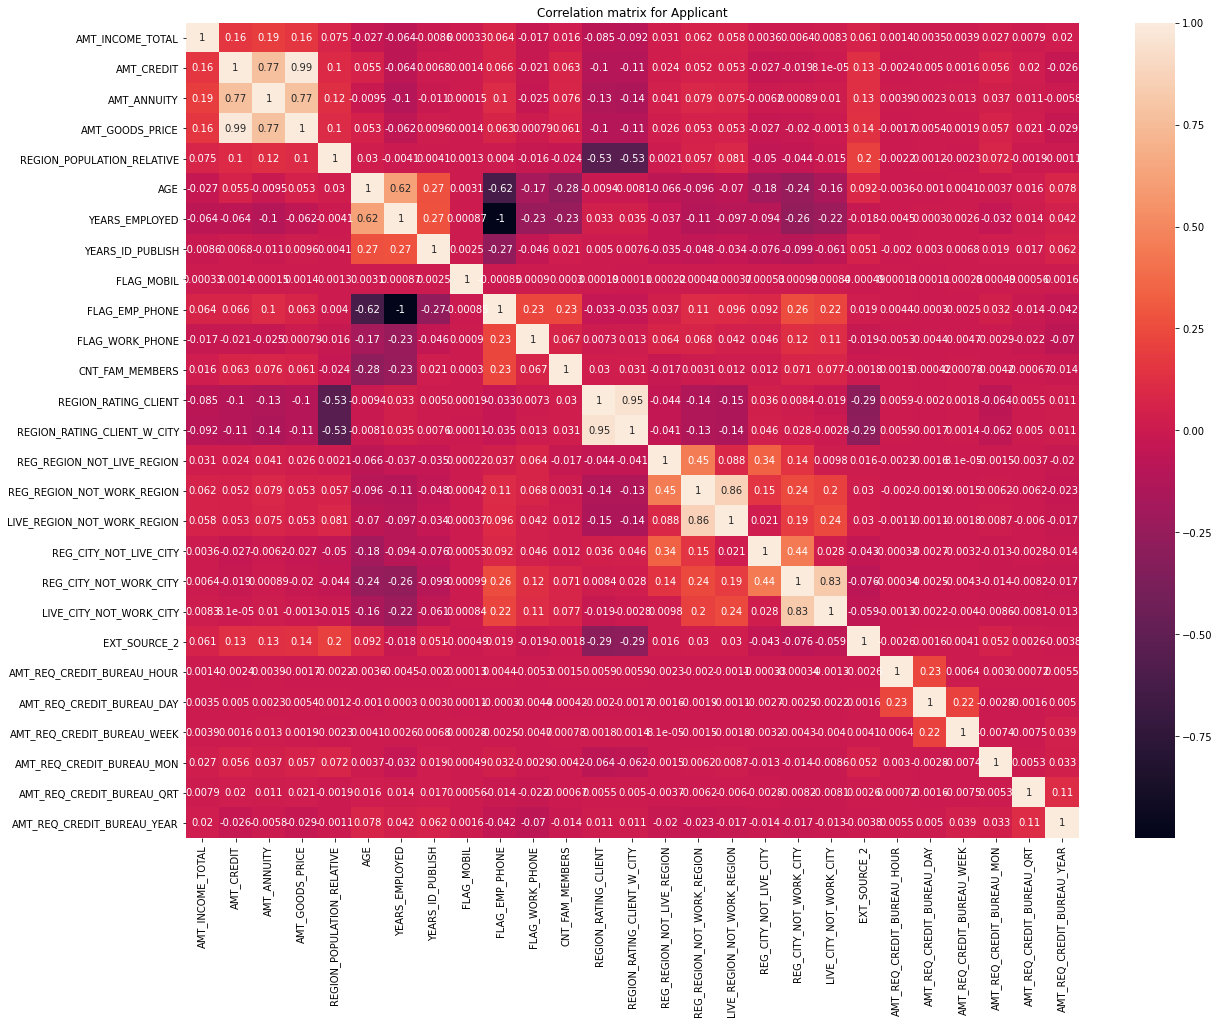

In [85]:

#With Payment Difficulties
plt.figure(figsize=(20,15)) 
sns.heatmap(applicant.corr(),annot=True)
plt.title('Correlation matrix for Applicant')
plt.show()


In [86]:

corr2 = applicant[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','YEARS_EMPLOYED','AGE','YEARS_ID_PUBLISH','AMT_CREDIT','EXT_SOURCE_2','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY']].corr()
corr_df3 = corr1.where(np.triu(np.ones(corr2.shape), k=1).astype(np.bool))
corr_df3 = corr_df3.unstack().reset_index().dropna(subset = [0])
corr_df3.columns = ['VAR1', 'VAR2', 'Correlation_Value']
corr_df3['Corr_abs'] = abs(corr_df3['Correlation_Value'])
corr_df3.sort_values(by = "Corr_abs", ascending =False, inplace = True)
corr_df3.head(3)


,VAR1,VAR2,Correlation_Value,Corr_abs
66,AMT_CREDIT,AMT_GOODS_PRICE,0.982783,0.982783
22,AMT_ANNUITY,AMT_GOODS_PRICE,0.752295,0.752295
68,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195


From the table above, we can conclude that the Credit/Income/Goods/Annuity columns have the maximum correlation between each other

In [87]:
'''
#To load in the massive files

#For Previous Application Data
f1="C:/Users/ru1457/Downloads/previous_application.csv"

#Reading in the file using chuks because of the massive size of the file
chunksize = 10 ** 5
TextFileReader = pd.read_csv(f1, chunksize=chunksize)       
        
previous_application = pd.concat(TextFileReader, ignore_index=True) 
'''

'\n#To load in the massive files\n\n#For Previous Application Data\nf1="C:/Users/ru1457/Downloads/previous_application.csv"\n\n#Reading in the file using chuks because of the massive size of the file\nchunksize = 10 ** 5\nTextFileReader = pd.read_csv(f1, chunksize=chunksize)       \n        \nprevious_application = pd.concat(TextFileReader, ignore_index=True) \n'

In [88]:
import random

filename="C:/Users/ru1457/Downloads/previous_application.csv"
num_lines = sum(1 for i in open(filename))
#num_lines
size = int(num_lines)//100000
#size
random.seed(1)
skip_id= random.sample(range(1, num_lines), size)

data= pd.read_csv(filename, skiprows = skip_id)

MemoryError: Unable to allocate 12.7 MiB for an array with shape (1670198,) and data type float64